# Оценка Average Profit Percent параметров

=== АНАЛИЗ ПАРАМЕТРОВ WALK-FORWARD ТЕСТИРОВАНИЯ ===

Out-of-Sample данные:
  period  fast_sma  slow_sma  avg_profit
0  OOS_1        75       460        8.72
1  OOS_2       170       240       -0.29
2  OOS_3        80       450        1.69
3  OOS_4       205       300       10.58
4  OOS_5       160       490        4.64
5  OOS_6       185       410        1.61
6  OOS_7        75       320        2.49
7  OOS_8       180       400        6.40
8  OOS_9       185       500        4.55

Последний In-Sample: fast_sma=225, slow_sma=500, avg_profit=5.49%

СТАТИСТИЧЕСКАЯ ОЦЕНКА ПАРАМЕТРОВ IN-SAMPLE

Fast SMA:
  OOS статистики: μ=146.11, σ=53.49
  OOS диапазон: [75.00, 205.00]
  IS значение: 225
  
  1. Z-Score: 1.4749
  2. Coefficient of Variation: 36.6%
  3. Range Containment: НЕТ
  
  Статус Z-Score: ПРИЕМЛЕМЫЙ
  Статус стабильности: УМЕРЕННО СТАБИЛЬНЫЙ
  Статус диапазона: ВНЕ ДИАПАЗОНА
  
  Общий балл надежности: 2/7
  Предупреждения: Умеренное отклонение (Z=1.47); Умеренная нестабильность OO

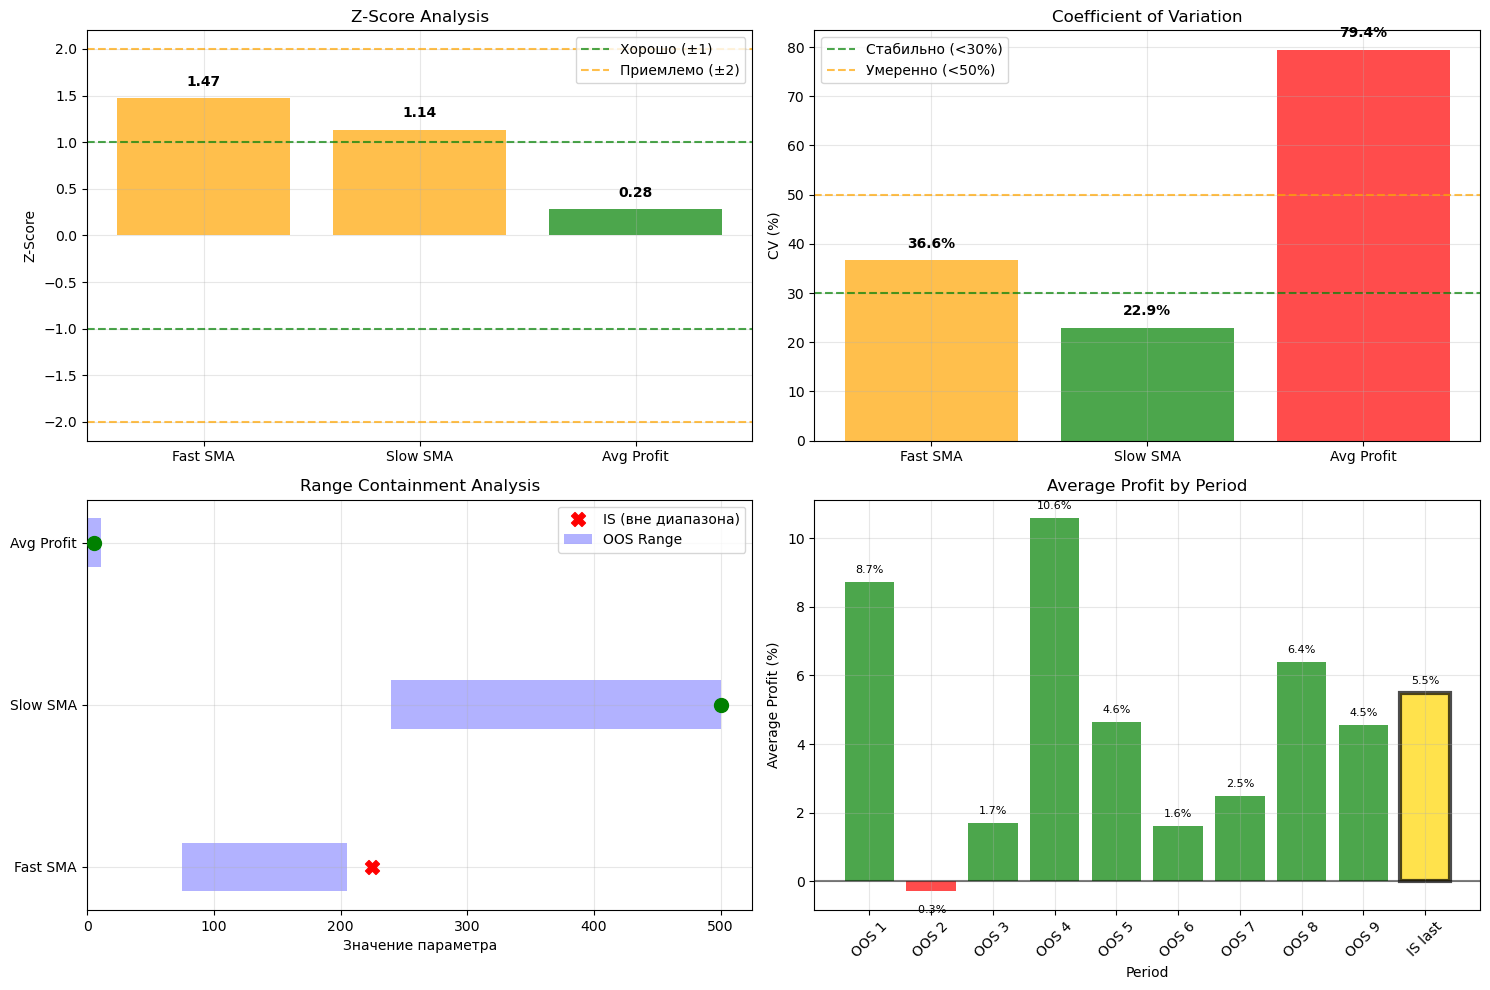


АНАЛИЗ ЗАВЕРШЕН


In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Новые данные из walk-forward тестирования
data = {
    'period': ['OOS_1', 'OOS_2', 'OOS_3', 'OOS_4', 'OOS_5', 'OOS_6', 'OOS_7', 'OOS_8', 'OOS_9', 'IS_last'],
    'fast_sma': [75, 170, 80, 205, 160, 185, 75, 180, 185, 225],
    'slow_sma': [460, 240, 450, 300, 490, 410, 320, 400, 500, 500],
    'avg_profit': [8.72, -0.29, 1.69, 10.58, 4.64, 1.61, 2.49, 6.40, 4.55, 5.49]
}

df = pd.DataFrame(data)

# Разделяем OOS и последний IS
oos_data = df[df['period'].str.contains('OOS')].copy()
is_last = df[df['period'] == 'IS_last'].iloc[0]

print("=== АНАЛИЗ ПАРАМЕТРОВ WALK-FORWARD ТЕСТИРОВАНИЯ ===\n")
print("Out-of-Sample данные:")
print(oos_data[['period', 'fast_sma', 'slow_sma', 'avg_profit']])
print(f"\nПоследний In-Sample: fast_sma={is_last['fast_sma']}, slow_sma={is_last['slow_sma']}, avg_profit={is_last['avg_profit']:.2f}%")

# === СТАТИСТИЧЕСКАЯ ОЦЕНКА ПАРАМЕТРОВ IS ===
print("\n" + "="*80)
print("СТАТИСТИЧЕСКАЯ ОЦЕНКА ПАРАМЕТРОВ IN-SAMPLE")
print("="*80)

def parameter_reliability_analysis(oos_values, is_value, param_name):
    """Упрощенный анализ надежности параметра"""
    mean_oos = np.mean(oos_values)
    std_oos = np.std(oos_values, ddof=1)
    
    # 1. Z-score Analysis
    z_score = (is_value - mean_oos) / std_oos if std_oos > 0 else 0
    
    # 2. Coefficient of Variation
    cv = std_oos / abs(mean_oos) * 100 if mean_oos != 0 else 0
    
    # 3. Range Containment
    within_range = np.min(oos_values) <= is_value <= np.max(oos_values)
    
    print(f"\n{param_name}:")
    print(f"  OOS статистики: μ={mean_oos:.2f}, σ={std_oos:.2f}")
    print(f"  OOS диапазон: [{np.min(oos_values):.2f}, {np.max(oos_values):.2f}]")
    if param_name == "Average Profit":
        print(f"  IS значение: {is_value:.2f}%")
    else:
        print(f"  IS значение: {is_value:.0f}")
    print(f"  ")
    print(f"  1. Z-Score: {z_score:.4f}")
    print(f"  2. Coefficient of Variation: {cv:.1f}%")
    print(f"  3. Range Containment: {'ДА' if within_range else 'НЕТ'}")
    
    # Оценка надежности по трем критериям
    reliability_score = 0
    warnings = []
    
    # Z-score оценка
    if abs(z_score) <= 1:
        reliability_score += 3
        z_status = "ОТЛИЧНЫЙ"
    elif abs(z_score) <= 2:
        reliability_score += 1
        z_status = "ПРИЕМЛЕМЫЙ"
        warnings.append(f"Умеренное отклонение (Z={z_score:.2f})")
    else:
        z_status = "КРИТИЧЕСКИЙ"
        warnings.append(f"КРИТИЧЕСКОЕ отклонение (Z={z_score:.2f})")
    
    # CV оценка
    if cv < 30:
        reliability_score += 2
        cv_status = "СТАБИЛЬНЫЙ"
    elif cv < 50:
        reliability_score += 1
        cv_status = "УМЕРЕННО СТАБИЛЬНЫЙ"
        warnings.append(f"Умеренная нестабильность OOS (CV={cv:.1f}%)")
    else:
        cv_status = "НЕСТАБИЛЬНЫЙ"
        warnings.append(f"Высокая нестабильность OOS (CV={cv:.1f}%)")
    
    # Range containment оценка
    if within_range:
        reliability_score += 2
        range_status = "В ДИАПАЗОНЕ"
    else:
        range_status = "ВНЕ ДИАПАЗОНА"
        warnings.append("Выходит за пределы OOS диапазона")
    
    print(f"  ")
    print(f"  Статус Z-Score: {z_status}")
    print(f"  Статус стабильности: {cv_status}")
    print(f"  Статус диапазона: {range_status}")
    print(f"  ")
    print(f"  Общий балл надежности: {reliability_score}/7")
    
    if warnings:
        print(f"  Предупреждения: {'; '.join(warnings)}")
    
    return {
        'z_score': z_score,
        'cv': cv,
        'within_range': within_range,
        'reliability_score': reliability_score,
        'warnings': warnings
    }

# Анализируем каждый параметр
fast_analysis = parameter_reliability_analysis(oos_data['fast_sma'].values, is_last['fast_sma'], "Fast SMA")
slow_analysis = parameter_reliability_analysis(oos_data['slow_sma'].values, is_last['slow_sma'], "Slow SMA")
profit_analysis = parameter_reliability_analysis(oos_data['avg_profit'].values, is_last['avg_profit'], "Average Profit")

# Общая оценка надежности IS параметров
total_reliability = fast_analysis['reliability_score'] + slow_analysis['reliability_score'] + profit_analysis['reliability_score']
max_reliability = 21

print(f"\n{'='*60}")
print("ИТОГОВАЯ ОЦЕНКА НАДЕЖНОСТИ")
print(f"{'='*60}")
print(f"Общий балл надежности: {total_reliability}/{max_reliability} ({total_reliability/max_reliability*100:.1f}%)")

# Определяем уровень надежности
if total_reliability >= 18:
    reliability_level = "ВЫСОКАЯ НАДЕЖНОСТЬ"
    status_color = "🟢"
elif total_reliability >= 12:
    reliability_level = "УМЕРЕННАЯ НАДЕЖНОСТЬ"
    status_color = "🟡"
elif total_reliability >= 6:
    reliability_level = "НИЗКАЯ НАДЕЖНОСТЬ"
    status_color = "🟠"
else:
    reliability_level = "КРИТИЧЕСКИ НИЗКАЯ НАДЕЖНОСТЬ"
    status_color = "🔴"

print(f"{status_color} Уровень надежности: {reliability_level}")

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# График 1: Z-Score для всех параметров
ax1 = axes[0,0]
params = ['Fast SMA', 'Slow SMA', 'Avg Profit']
z_scores = [fast_analysis['z_score'], slow_analysis['z_score'], profit_analysis['z_score']]
colors = ['green' if abs(z) <= 1 else 'orange' if abs(z) <= 2 else 'red' for z in z_scores]

bars = ax1.bar(params, z_scores, color=colors, alpha=0.7)
ax1.axhline(y=1, color='green', linestyle='--', alpha=0.7, label='Хорошо (±1)')
ax1.axhline(y=-1, color='green', linestyle='--', alpha=0.7)
ax1.axhline(y=2, color='orange', linestyle='--', alpha=0.7, label='Приемлемо (±2)')
ax1.axhline(y=-2, color='orange', linestyle='--', alpha=0.7)
ax1.set_title('Z-Score Analysis')
ax1.set_ylabel('Z-Score')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, z in zip(bars, z_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (0.1 if height >= 0 else -0.15),
             f'{z:.2f}', ha='center', va='bottom' if height >= 0 else 'top', fontweight='bold')

# График 2: Coefficient of Variation
ax2 = axes[0,1]
cvs = [fast_analysis['cv'], slow_analysis['cv'], profit_analysis['cv']]
cv_colors = ['green' if cv < 30 else 'orange' if cv < 50 else 'red' for cv in cvs]

bars = ax2.bar(params, cvs, color=cv_colors, alpha=0.7)
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Стабильно (<30%)')
ax2.axhline(y=50, color='orange', linestyle='--', alpha=0.7, label='Умеренно (<50%)')
ax2.set_title('Coefficient of Variation')
ax2.set_ylabel('CV (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, cv in zip(bars, cvs):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{cv:.1f}%', ha='center', va='bottom', fontweight='bold')

# График 3: Range Containment визуализация
ax3 = axes[1,0]
analyses = [fast_analysis, slow_analysis, profit_analysis]
oos_data_lists = [oos_data['fast_sma'].values, oos_data['slow_sma'].values, oos_data['avg_profit'].values]
is_values = [is_last['fast_sma'], is_last['slow_sma'], is_last['avg_profit']]

for i, (param, analysis, oos_vals, is_val) in enumerate(zip(params, analyses, oos_data_lists, is_values)):
    min_oos, max_oos = np.min(oos_vals), np.max(oos_vals)
    
    # Рисуем диапазон OOS
    ax3.barh(i, max_oos - min_oos, left=min_oos, height=0.3, alpha=0.3, color='blue', label='OOS Range' if i == 0 else '')
    
    # Рисуем IS значение
    color = 'green' if analysis['within_range'] else 'red'
    marker = 'o' if analysis['within_range'] else 'X'
    ax3.scatter(is_val, i, color=color, s=100, marker=marker, zorder=5, 
               label='IS (в диапазоне)' if i == 0 and analysis['within_range'] else 'IS (вне диапазона)' if i == 0 else '')

ax3.set_yticks(range(len(params)))
ax3.set_yticklabels(params)
ax3.set_xlabel('Значение параметра')
ax3.set_title('Range Containment Analysis')
ax3.legend()
ax3.grid(True, alpha=0.3)

# График 4: Прибыльность по периодам
ax4 = axes[1,1]
all_periods = list(oos_data['period']) + ['IS_last']
all_profits = list(oos_data['avg_profit']) + [is_last['avg_profit']]
colors = ['green' if p > 0 else 'red' for p in all_profits]
colors[-1] = 'gold'  # IS период выделяем золотым

bars = ax4.bar(range(len(all_periods)), all_profits, color=colors, alpha=0.7)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax4.set_title('Average Profit by Period')
ax4.set_xlabel('Period')
ax4.set_ylabel('Average Profit (%)')
ax4.set_xticks(range(len(all_periods)))
ax4.set_xticklabels([p.replace('_', ' ') for p in all_periods], rotation=45)
ax4.grid(True, alpha=0.3)

# Выделяем IS период
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(3)

# Добавляем значения на столбцы
for bar, profit in zip(bars, all_profits):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + (0.2 if height >= 0 else -0.4),
             f'{profit:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("АНАЛИЗ ЗАВЕРШЕН")
print(f"{'='*60}")

# Ключевые наблюдения:
### 1. Критически высокая нестабильность Average Profit (CV=79.4%)
* Это самый тревожный сигнал. При пороге стабильности <30%, показатель 79.4% указывает на экстремальную непредсказуемость. Прибыль колеблется от -0.29% до 10.58% - разброс в 37 раз!

### 2. Парадокс Range Containment для Fast SMA
* Fast SMA находится ВНЕ диапазона OOS (диапазон: 75-205, IS: 225)
* Это классический признак переобучения - мы нашли параметр, который никогда не появлялся в реальных условиях

### 3. Обманчивая "средняя" производительность IS
* IS показывает 5.49% прибыли, что кажется разумным на фоне среднего OOS (4.49%), но:
* Это 4-е место из 10 периодов
* При таком высоком CV (79.4%) эта позиция может быть случайной

### Red Flags переобучения:
* Fast SMA = 225 - никогда не встречался в OOS (максимум 205)
* Экстремальная нестабильность прибыли говорит о том, что система не имеет устойчивого edge
* Z-Score Fast SMA = 1.47 - близко к критическому порогу

### Статистические аномалии:
* Система показывает 88.9% прибыльных периодов в OOS, но с огромным разбросом
* IS параметры генерируют "средний" результат, но методом, который статистически подозрителен

### Вывод:
* Общий балл 12/21 (57.1%) = "УМЕРЕННАЯ НАДЕЖНОСТЬ" - это обманчиво оптимистичная оценка.